In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)


In [4]:
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.shape

(374, 13)

In [8]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [10]:
df.rename(columns = {'Person ID': 'person_id',
                       'Gender': 'gender',
                       'Age': 'age',
                       'Occupation': 'occupation',
                       'Sleep Duration': 'sleep_duration',
                       'Quality of Sleep': 'quality_of_sleep',
                       'Physical Activity Level': 'physical_activity_level',
                       'Stress Level': 'stress_level',
                       'BMI Category': 'bmi_category',
                       'Blood Pressure': 'blood_pressure',
                       'Heart Rate': 'heart_rate',
                       'Daily Steps': 'daily_steps',
                       'Sleep Disorder': 'sleep_disorder'
                      }, inplace=True)

In [11]:
df.nunique()

person_id                  374
gender                       2
age                         31
occupation                  11
sleep_duration              27
quality_of_sleep             6
physical_activity_level     16
stress_level                 6
bmi_category                 4
blood_pressure              25
heart_rate                  19
daily_steps                 20
sleep_disorder               3
dtype: int64

In [12]:
df['occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [13]:
df['occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: occupation, dtype: int64

In [14]:
df.loc[df.occupation=='Software Engineer','occupation']='Engineer'
df.loc[df.occupation=='Sales Representative','occupation']='salesperson'
df.loc[df.occupation=='Scientist','occupation']='Other'
df.loc[df.occupation=='Manager','occupation']='Other'


In [15]:
df['occupation'].unique()

array(['Engineer', 'Doctor', 'salesperson', 'Teacher', 'Nurse',
       'Accountant', 'Other', 'Lawyer', 'Salesperson'], dtype=object)

In [16]:
df.bmi_category.unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [17]:
df.bmi_category.value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: bmi_category, dtype: int64

In [18]:
df.sleep_disorder.unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [19]:
df.sleep_disorder=df.sleep_disorder.fillna(value='None')

In [20]:
df.blood_pressure

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: blood_pressure, Length: 374, dtype: object

In [21]:
df[['systolic_blood_pressure','diastolic_blood_pressure']]=df['blood_pressure'].str.split('/',expand=True).astype(int)

In [22]:
df.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,systolic_blood_pressure,diastolic_blood_pressure
0,1,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [23]:
selected_columns=['age','sleep_duration','quality_of_sleep','physical_activity_level','stress_level','heart_rate','daily_steps','systolic_blood_pressure','diastolic_blood_pressure']
df_selected=df[selected_columns]

In [24]:
corr=df_selected.corr()

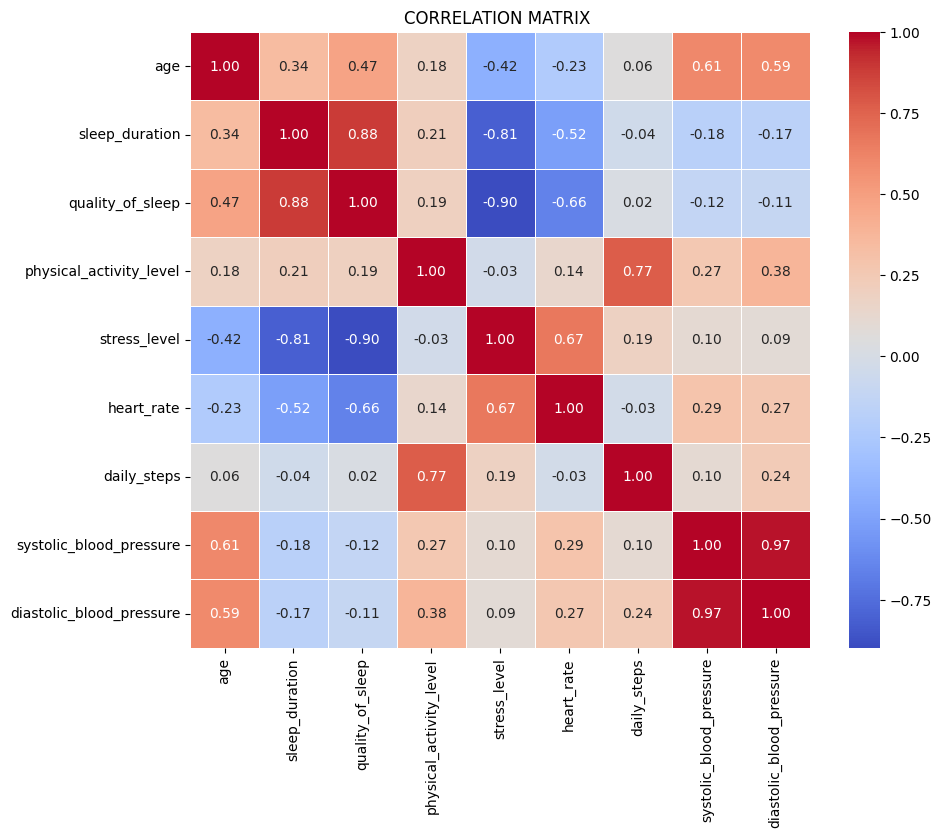

In [25]:
plt.figure(figsize=(10,8))
plt.title("CORRELATION MATRIX ")
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f',linewidths=.5)
plt.show()

In [26]:
sv=df[['sleep_duration','quality_of_sleep','sleep_disorder']].copy(deep=True)

In [27]:
sv.head()

,sleep_duration,quality_of_sleep,sleep_disorder
0,6.1,6,None
1,6.2,6,None
2,6.2,6,None
3,5.9,4,Sleep Apnea
4,5.9,4,Sleep Apnea


In [28]:
sleep_disorder_counts=sv['sleep_disorder'].value_counts()

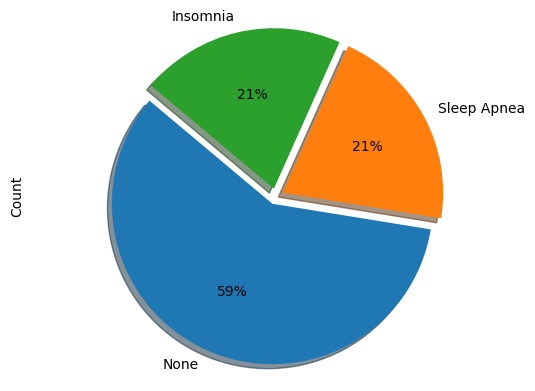

In [29]:
sleep_disorder_counts.plot(kind='pie',autopct='%1.0f%%',explode=[0.05]*len(sleep_disorder_counts),shadow=True,startangle=140)
plt.axis('equal')
plt.ylabel('Count')
plt.show()

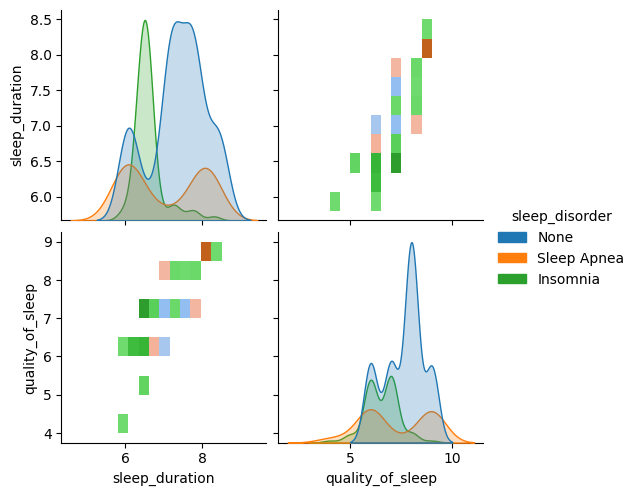

In [30]:
sns.pairplot(data=sv,kind='hist',hue='sleep_disorder',diag_kind='kde')
plt.show()

In [31]:
sv.groupby('sleep_disorder').mean()

,sleep_duration,quality_of_sleep
sleep_disorder,,
Insomnia,6.589610,6.532468
None,7.358447,7.625571
Sleep Apnea,7.032051,7.205128


<Axes: xlabel='quality_of_sleep', ylabel='sleep_disorder'>

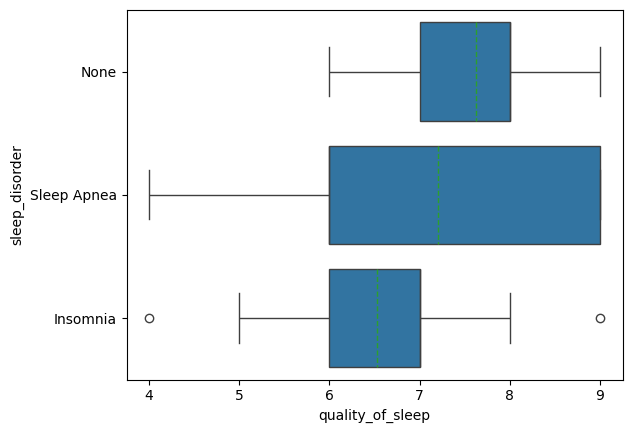

In [32]:
sns.boxplot(data=sv,x='quality_of_sleep',y='sleep_disorder',showmeans=True,meanline=True)

In [33]:
sv.groupby('sleep_disorder').corr(method='pearson',numeric_only=True)

sleep_duration  quality_of_sleep
sleep_disorder                                                   
Insomnia       sleep_duration          1.000000          0.753207
               quality_of_sleep        0.753207          1.000000
None           sleep_duration          1.000000          0.836940
               quality_of_sleep        0.836940          1.000000
Sleep Apnea    sleep_duration          1.000000          0.944228
               quality_of_sleep        0.944228          1.000000

In [34]:
scipy.stats.normaltest(sv.quality_of_sleep)

NormaltestResult(statistic=25.539591571592695, pvalue=2.8454316322969777e-06)

In [35]:
scipy.stats.mannwhitneyu(sv[sv.sleep_disorder=='None'].quality_of_sleep,sv[sv.sleep_disorder=='Insomnia'].quality_of_sleep)

MannwhitneyuResult(statistic=13330.5, pvalue=2.8434741946408995e-15)

In [36]:
scipy.stats.mannwhitneyu(sv[sv.sleep_disorder=='None'].quality_of_sleep,sv[sv.sleep_disorder=='Sleep Apnea'].quality_of_sleep)

MannwhitneyuResult(statistic=9450.5, pvalue=0.1469825908691403)

In [37]:
scipy.stats.mannwhitneyu(sv[sv.sleep_disorder=='Sleep Apnea'].quality_of_sleep,sv[sv.sleep_disorder=='Insomnia'].quality_of_sleep)

MannwhitneyuResult(statistic=3534.5, pvalue=0.04549503830464518)

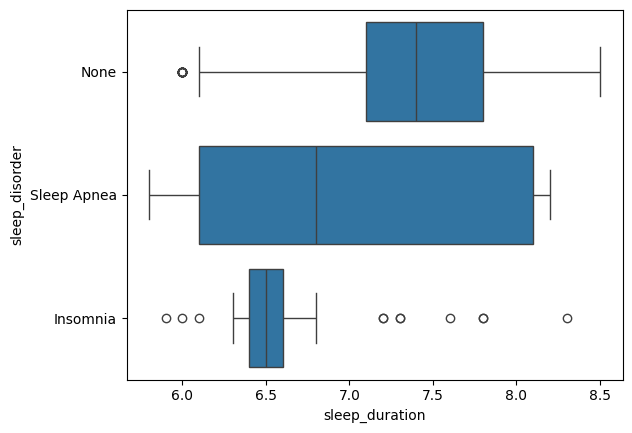

In [38]:
sns.boxplot(data=sv,x='sleep_duration',y='sleep_disorder',)
plt.show()

In [39]:
scipy.stats.normaltest(sv.sleep_duration)

NormaltestResult(statistic=421.66773216455977, pvalue=2.7290743156282892e-92)

In [40]:
scipy.stats.mannwhitneyu(sv[sv.sleep_disorder=='None'].sleep_duration,sv[sv.sleep_disorder=='Sleep Apnea'].sleep_duration)

MannwhitneyuResult(statistic=9772.5, pvalue=0.05810214416524308)

In [41]:
scipy.stats.mannwhitneyu(sv[sv.sleep_disorder=='None'].sleep_duration,sv[sv.sleep_disorder=='Insomnia'].sleep_duration)

MannwhitneyuResult(statistic=13266.5, pvalue=6.335915075528475e-14)

In [42]:
scipy.stats.mannwhitneyu(sv[sv.sleep_disorder=='Sleep Apnea'].sleep_duration,sv[sv.sleep_disorder=='Insomnia'].sleep_duration)

MannwhitneyuResult(statistic=3206.5, pvalue=0.46550737996645586)

In [43]:
sv.corr(method='pearson',numeric_only=True)

,sleep_duration,quality_of_sleep
sleep_duration,1.000000,0.883213
quality_of_sleep,0.883213,1.000000


In [44]:
sv.groupby('sleep_disorder').corr(method='pearson')

sleep_duration  quality_of_sleep
sleep_disorder                                                   
Insomnia       sleep_duration          1.000000          0.753207
               quality_of_sleep        0.753207          1.000000
None           sleep_duration          1.000000          0.836940
               quality_of_sleep        0.836940          1.000000
Sleep Apnea    sleep_duration          1.000000          0.944228
               quality_of_sleep        0.944228          1.000000

In [45]:
demo_sleep=df[['sleep_disorder','quality_of_sleep','sleep_duration','gender','age','occupation']].copy(deep=True)

In [46]:
demo_sleep.head()

,sleep_disorder,quality_of_sleep,sleep_duration,gender,age,occupation
0,None,6,6.1,Male,27,Engineer
1,None,6,6.2,Male,28,Doctor
2,None,6,6.2,Male,28,Doctor
3,Sleep Apnea,4,5.9,Male,28,salesperson
4,Sleep Apnea,4,5.9,Male,28,salesperson


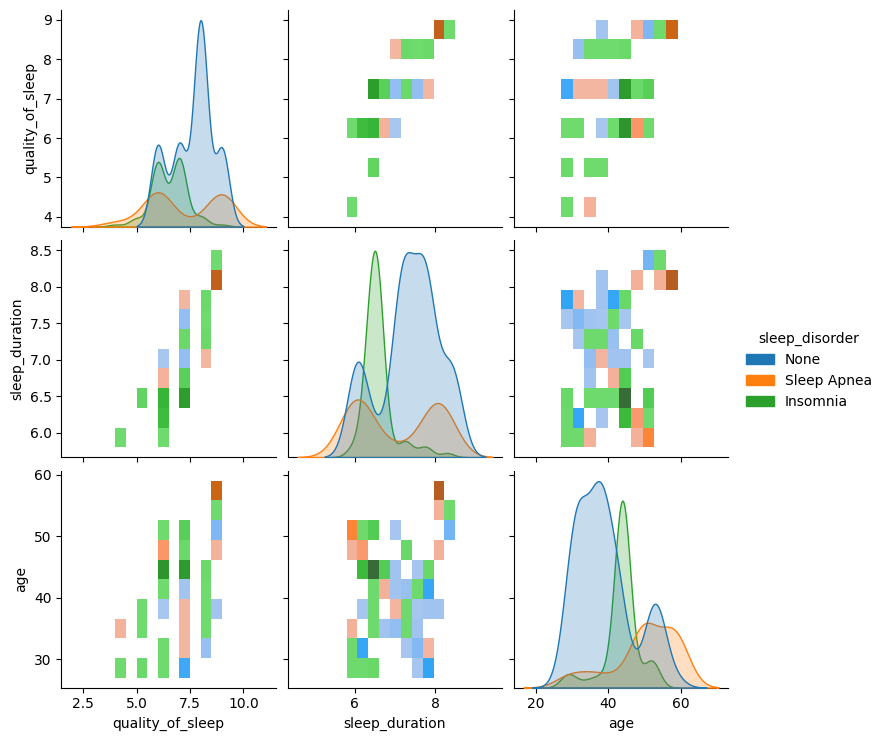

In [47]:
sns.pairplot(data=demo_sleep,kind='hist',hue='sleep_disorder',diag_kind='kde')

In [48]:
demo_sleep.corr(method='pearson',numeric_only=True)

,quality_of_sleep,sleep_duration,age
quality_of_sleep,1.000000,0.883213,0.473734
sleep_duration,0.883213,1.000000,0.344709
age,0.473734,0.344709,1.000000


In [49]:
demo_sleep.groupby('gender').mean(numeric_only=True)


,quality_of_sleep,sleep_duration,age
gender,,,
Female,7.664865,7.229730,47.405405
Male,6.968254,7.036508,37.074074


In [50]:
scipy.stats.mannwhitneyu(demo_sleep[demo_sleep.gender=='Male'].sleep_duration,demo_sleep[demo_sleep.gender=='Female'].sleep_duration)

MannwhitneyuResult(statistic=14929.5, pvalue=0.014440351736077347)

In [51]:
scipy.stats.mannwhitneyu(demo_sleep[demo_sleep.gender=='Male'].quality_of_sleep, demo_sleep[demo_sleep.gender =='Female'].quality_of_sleep)

MannwhitneyuResult(statistic=11596.0, pvalue=6.047606194925148e-09)

In [52]:
scipy.stats.mannwhitneyu(demo_sleep[demo_sleep.gender=='Male'].age,demo_sleep[demo_sleep.gender=='Female'].age)

MannwhitneyuResult(statistic=5644.0, pvalue=8.379659804355159e-30)

<Axes: xlabel='sleep_duration', ylabel='gender'>

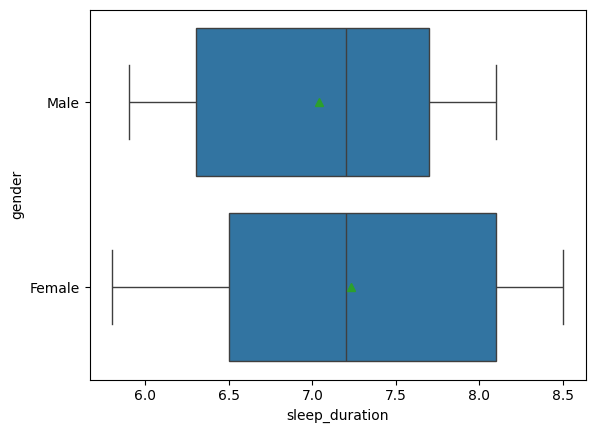

In [53]:
sns.boxplot(data=demo_sleep,x='sleep_duration',y='gender',showmeans=True)

<Axes: xlabel='quality_of_sleep', ylabel='gender'>

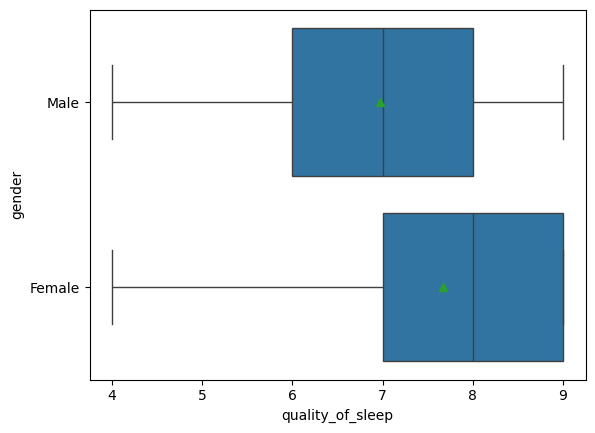

In [54]:
sns.boxplot(data=demo_sleep,x='quality_of_sleep',y='gender',showmeans=True)

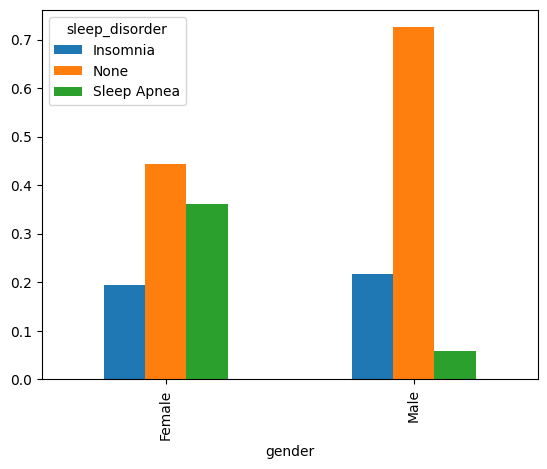

In [56]:
grouped=demo_sleep.groupby('gender')['sleep_disorder'].value_counts(normalize=True)
grouped=grouped.unstack()
grouped.plot(kind='bar')
plt.show()

In [57]:
demo_sleep.groupby('occupation').mean(numeric_only=True)



,quality_of_sleep,sleep_duration,age
occupation,,,
Accountant,7.891892,7.113514,39.621622
Doctor,6.647887,6.970423,32.676056
Engineer,8.298507,7.913433,45.671642
Lawyer,7.893617,7.410638,39.425532
Nurse,7.369863,7.063014,51.794521
Other,5.400000,6.180000,35.800000
Salesperson,6.000000,6.403125,43.531250
Teacher,6.975000,6.690000,41.725000
salesperson,4.000000,5.900000,28.000000


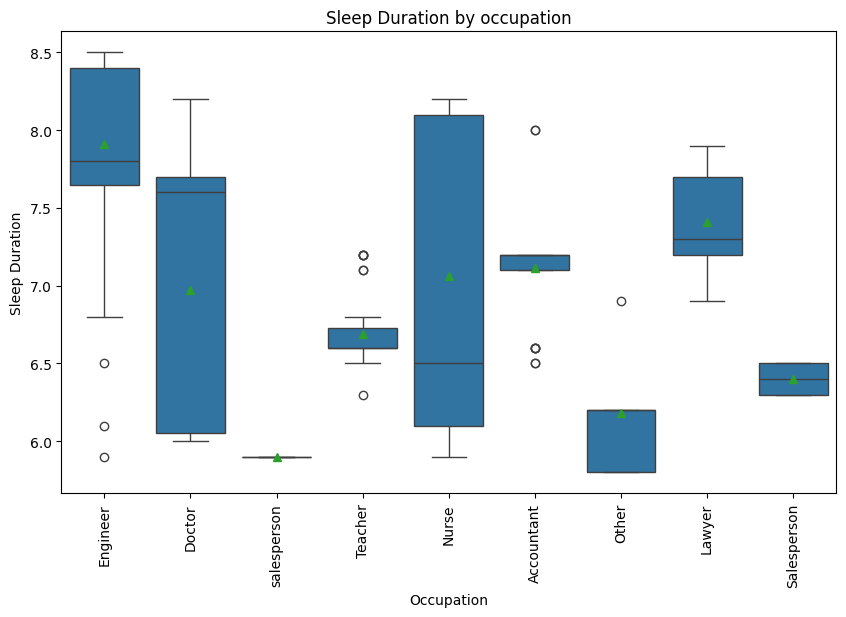

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(data=demo_sleep,x='occupation',y='sleep_duration',showmeans=True)
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=90)
plt.title('Sleep Duration by occupation')
plt.show()

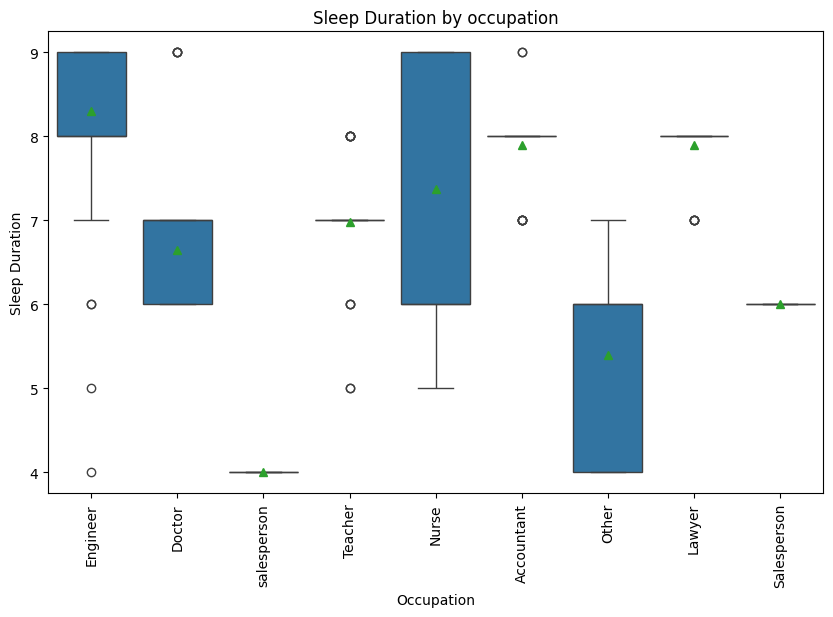

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(data=demo_sleep,x='occupation',y='quality_of_sleep',showmeans=True)
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.xticks(rotation=90)
plt.title('Sleep Duration by occupation')
plt.show()

<Axes: xlabel='occupation'>

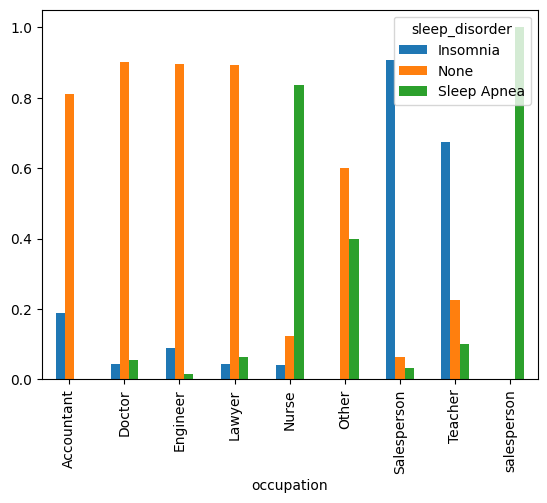

In [60]:
demo_sleep.groupby('occupation')['sleep_disorder'].value_counts(normalize=True).unstack().plot.bar()

In [61]:
healthy_sleep=df[['sleep_disorder','quality_of_sleep','sleep_duration','physical_activity_level','daily_steps','stress_level','bmi_category','heart_rate','systolic_blood_pressure','diastolic_blood_pressure']].copy(deep=True)


In [62]:
healthy_sleep.head()

,sleep_disorder,quality_of_sleep,sleep_duration,physical_activity_level,daily_steps,stress_level,bmi_category,heart_rate,systolic_blood_pressure,diastolic_blood_pressure
0,None,6,6.1,42,4200,6,Overweight,77,126,83
1,None,6,6.2,60,10000,8,Normal,75,125,80
2,None,6,6.2,60,10000,8,Normal,75,125,80
3,Sleep Apnea,4,5.9,30,3000,8,Obese,85,140,90
4,Sleep Apnea,4,5.9,30,3000,8,Obese,85,140,90


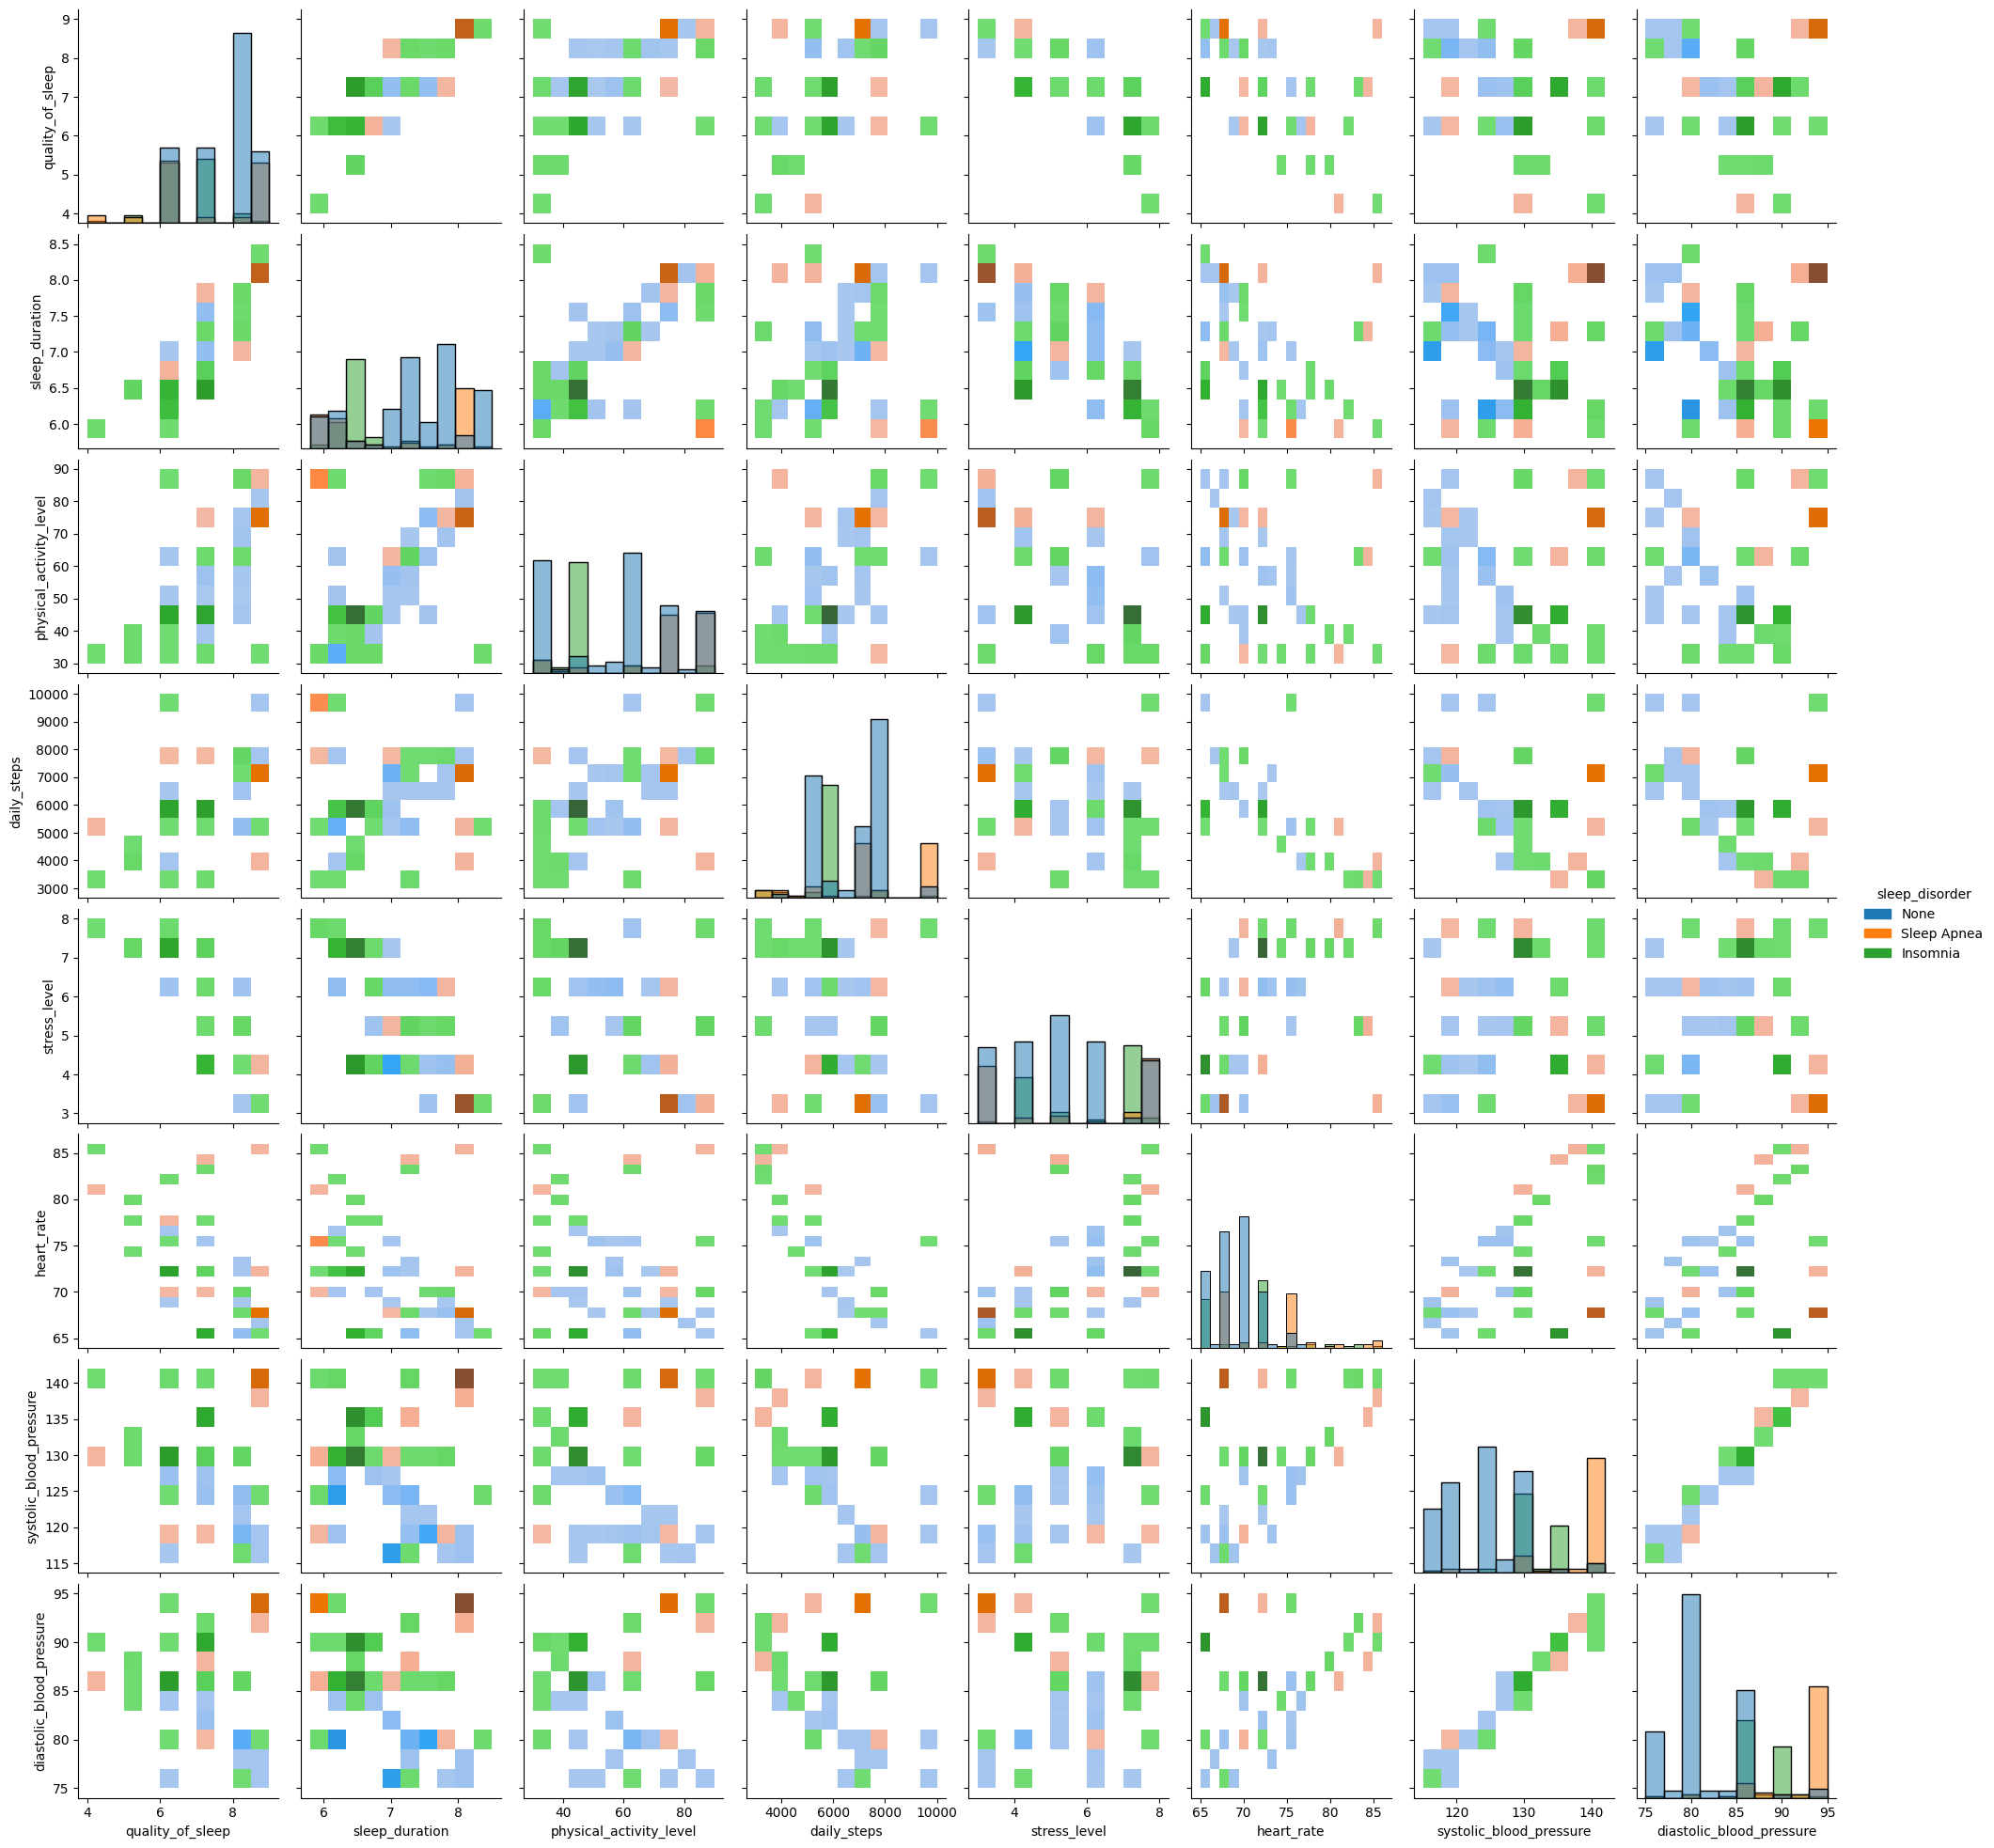

In [63]:
sns.pairplot(data=healthy_sleep,kind='hist',hue='sleep_disorder')

In [64]:
healthy_sleep.groupby('sleep_disorder').mean(numeric_only=True)

,quality_of_sleep,sleep_duration,physical_activity_level,daily_steps,stress_level,heart_rate,systolic_blood_pressure,diastolic_blood_pressure
sleep_disorder,,,,,,,,
Insomnia,6.532468,6.589610,46.818182,5901.298701,5.870130,70.467532,132.038961,86.857143
None,7.625571,7.358447,57.949772,6852.968037,5.114155,69.018265,124.045662,81.000000
Sleep Apnea,7.205128,7.032051,74.794872,7619.230769,5.666667,73.089744,137.769231,92.717949


In [66]:
scipy.stats.normaltest(healthy_sleep.diastolic_blood_pressure)

NormaltestResult(statistic=43.1200849985241, pvalue=4.3310431735544495e-10)

In [67]:
scipy.stats.normaltest(healthy_sleep.systolic_blood_pressure)

NormaltestResult(statistic=44.32888074580998, pvalue=2.366496418710339e-10)

In [69]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.sleep_disorder=='None'].systolic_blood_pressure,
                         healthy_sleep[healthy_sleep.sleep_disorder=='Insomnia'].systolic_blood_pressure)

MannwhitneyuResult(statistic=2032.5, pvalue=2.7925337312647312e-24)

In [71]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.sleep_disorder == 'Insomnia'].systolic_blood_pressure, healthy_sleep[healthy_sleep.sleep_disorder == 'Sleep Apnea'].systolic_blood_pressure)


MannwhitneyuResult(statistic=970.5, pvalue=1.5833817261716064e-14)

In [72]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.sleep_disorder == 'None'].systolic_blood_pressure, healthy_sleep[healthy_sleep.sleep_disorder == 'Sleep Apnea'].systolic_blood_pressure)


MannwhitneyuResult(statistic=980.5, pvalue=3.099666428013716e-32)

In [73]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.sleep_disorder == 'None'].systolic_blood_pressure, healthy_sleep[healthy_sleep.sleep_disorder == 'Insomnia'].systolic_blood_pressure)


MannwhitneyuResult(statistic=2032.5, pvalue=2.7925337312647312e-24)

In [74]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.sleep_disorder == 'Insomnia'].diastolic_blood_pressure,
                         healthy_sleep[healthy_sleep.sleep_disorder == 'Sleep Apnea'].diastolic_blood_pressure)


MannwhitneyuResult(statistic=822.0, pvalue=2.933840387185841e-16)

In [75]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.sleep_disorder == 'None'].diastolic_blood_pressure, healthy_sleep[healthy_sleep.sleep_disorder == 'Sleep Apnea'].diastolic_blood_pressure)

MannwhitneyuResult(statistic=908.0, pvalue=5.657915311442221e-34)

In [77]:
healthy_sleep[['heart_rate','stress_level','quality_of_sleep','sleep_duration']].corr(method='pearson')


,heart_rate,stress_level,quality_of_sleep,sleep_duration
heart_rate,1.000000,0.670026,-0.659865,-0.516455
stress_level,0.670026,1.000000,-0.898752,-0.811023
quality_of_sleep,-0.659865,-0.898752,1.000000,0.883213
sleep_duration,-0.516455,-0.811023,0.883213,1.000000


In [78]:
healthy_sleep[['heart_rate','stress_level','quality_of_sleep','sleep_duration','sleep_disorder']].groupby('sleep_disorder').corr(method='pearson')


heart_rate  stress_level  quality_of_sleep  \
sleep_disorder                                                                
Insomnia       heart_rate          1.000000      0.719036         -0.605499   
               stress_level        0.719036      1.000000         -0.723100   
               quality_of_sleep   -0.605499     -0.723100          1.000000   
               sleep_duration     -0.163630     -0.487877          0.753207   
None           heart_rate          1.000000      0.800938         -0.809742   
               stress_level        0.800938      1.000000         -0.938882   
               quality_of_sleep   -0.809742     -0.938882          1.000000   
               sleep_duration     -0.678363     -0.778761          0.836940   
Sleep Apnea    heart_rate          1.000000      0.605020         -0.703582   
               stress_level        0.605020      1.000000         -0.945325   
               quality_of_sleep   -0.703582     -0.945325          1.000000   
               sleep_duration     -0.598596     -0.984028          0.944228   

                                 sleep_duration  
sleep_disorder                                   
Insomnia       heart_rate             -0.163630  
               stress_level           -0.487877  
               quality_of_sleep        0.753207  
               sleep_duration          1.000000  
None           heart_rate             -0.678363  
               stress_level           -0.778761  
               quality_of_sleep        0.836940  
               sleep_duration          1.000000  
Sleep Apnea    heart_rate             -0.598596  
               stress_level           -0.984028  
               quality_of_sleep        0.944228  
               sleep_duration          1.000000

In [79]:
df.groupby('bmi_category').mean(numeric_only=True)

,person_id,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,systolic_blood_pressure,diastolic_blood_pressure
bmi_category,,,,,,,,,,
Normal,140.051282,38.482051,7.393846,7.661538,57.692308,5.128205,68.728205,6887.179487,123.820513,80.666667
Normal Weight,135.904762,38.380952,7.333333,7.428571,60.333333,5.190476,71.285714,6766.666667,121.619048,80.000000
Obese,134.900000,38.000000,6.960000,6.400000,55.000000,5.700000,84.300000,3350.000000,139.200000,90.200000
Overweight,260.891892,47.885135,6.770270,6.898649,61.236486,5.729730,70.945946,6965.540541,135.054054,90.182432


In [80]:
df['bmi_category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: bmi_category, dtype: int64

In [85]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.bmi_category == 'Normal'].sleep_duration,
                         healthy_sleep[healthy_sleep.bmi_category == 'Overweight'].sleep_duration )


MannwhitneyuResult(statistic=20197.5, pvalue=2.1164673639511002e-10)

In [82]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.bmi_category=='Overweight'].sleep_duration,
                         healthy_sleep[healthy_sleep.bmi_category=='Obese'].sleep_duration)


MannwhitneyuResult(statistic=707.5, pvalue=0.8184198340604408)

In [86]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.bmi_category=='Normal'].sleep_duration,
                         healthy_sleep[healthy_sleep.bmi_category=='Obese'].sleep_duration)


MannwhitneyuResult(statistic=1227.0, pvalue=0.1671104828757327)

In [88]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.bmi_category == 'Normal'].quality_of_sleep,
                         healthy_sleep[healthy_sleep.bmi_category == 'Overweight'].quality_of_sleep )


MannwhitneyuResult(statistic=19773.0, pvalue=1.2002691339218174e-09)

In [89]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.bmi_category == 'Overweight'].quality_of_sleep,
                         healthy_sleep[healthy_sleep.bmi_category == 'Obese'].quality_of_sleep )


MannwhitneyuResult(statistic=796.0, pvalue=0.6723590634198593)

In [91]:
scipy.stats.mannwhitneyu(healthy_sleep[healthy_sleep.bmi_category=='Normal'].quality_of_sleep
                         ,healthy_sleep[healthy_sleep.bmi_category=='Obese'].quality_of_sleep)



MannwhitneyuResult(statistic=1379.5, pvalue=0.018328456044683916)